In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import math

**1. Выбор датасетов**: Студенты с нечетным порядковым номером в группе должны использовать Датасет про диабет

In [42]:
data = pd.read_csv('data/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [43]:
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

В таблице отсутствуют null-евые значения, однако, вместо них присутствуют нули, которые надо исключить

**Outcome** - категориальный признак

**Исключим записи с нулевыми значениями**

In [44]:
data = data[~data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].isin([0]).any(axis=1)]

In [45]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    392 non-null    int64  
 1   Glucose        392 non-null    int64  
 2   BloodPressure  392 non-null    int64  
 3   SkinThickness  392 non-null    int64  
 4   Insulin        392 non-null    int64  
 5   BMI            392 non-null    float64
 6   Pedigree       392 non-null    float64
 7   Age            392 non-null    int64  
 8   Outcome        392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


**Визуализируем**

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Pedigree'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

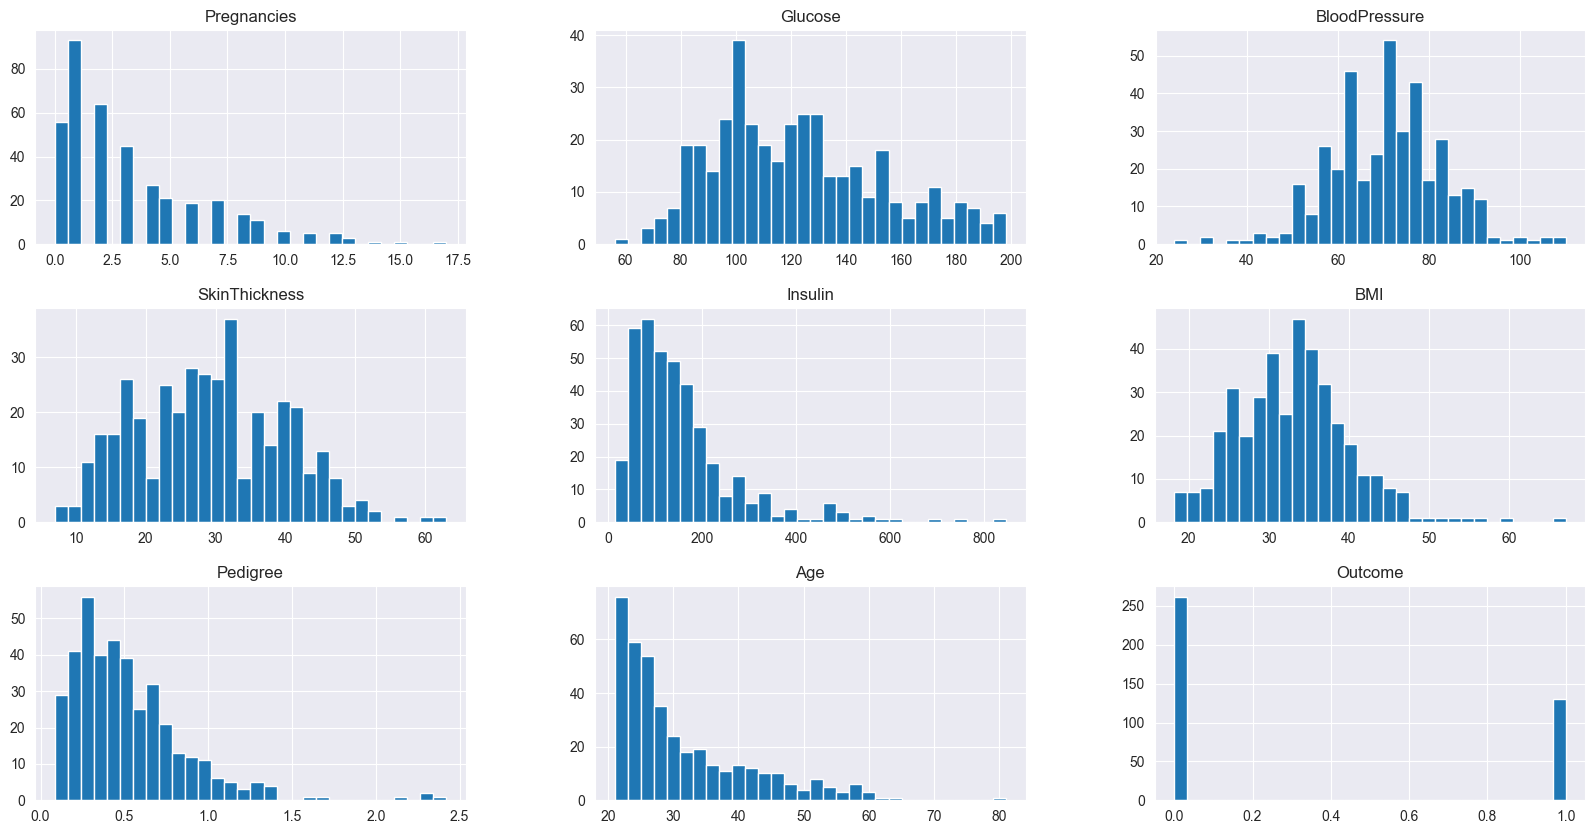

In [47]:
data.hist(bins=30, figsize=(20, 10))

**Балансируем датасет**

У нас неравенство кол-ва исходов Outcome - недиабетных больше диабетных в два раза, при таком раскладе вероятность попасть в группу к недиабетным выше, тк их просто больше. Чтобы это исправить, уравняем кол-во обычных и больных

In [48]:
desired_samples = data['Outcome'].value_counts().min()
cocherijka = data.groupby('Outcome').apply(lambda x: x.sample(desired_samples)).reset_index(drop=True)

**Нормализуем данные**

In [49]:
# Нормируем данные
def normalize_data(d):
    cop_data = d.copy()
    for column in d.columns:
        col_min = min(d[column])
        col_max = max(d[column])
        cop_data[column] = ((d[column] - col_min) / (col_max - col_min))
    return cop_data


norm_data = normalize_data(cocherijka)
norm_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,0.208597,0.505119,0.517933,0.417308,0.191023,0.309173,0.190818,0.269135,0.500000
std,0.201809,0.229031,0.155288,0.183698,0.150764,0.141189,0.157524,0.259002,0.500964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.309859,0.425000,0.285714,0.093750,0.221757,0.077616,0.075000,0.000000
50%,0.117647,0.485915,0.500000,0.410714,0.153846,0.308577,0.153087,0.175000,0.500000
75%,0.352941,0.676056,0.625000,0.558036,0.229567,0.382845,0.259005,0.425000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Pedigree'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

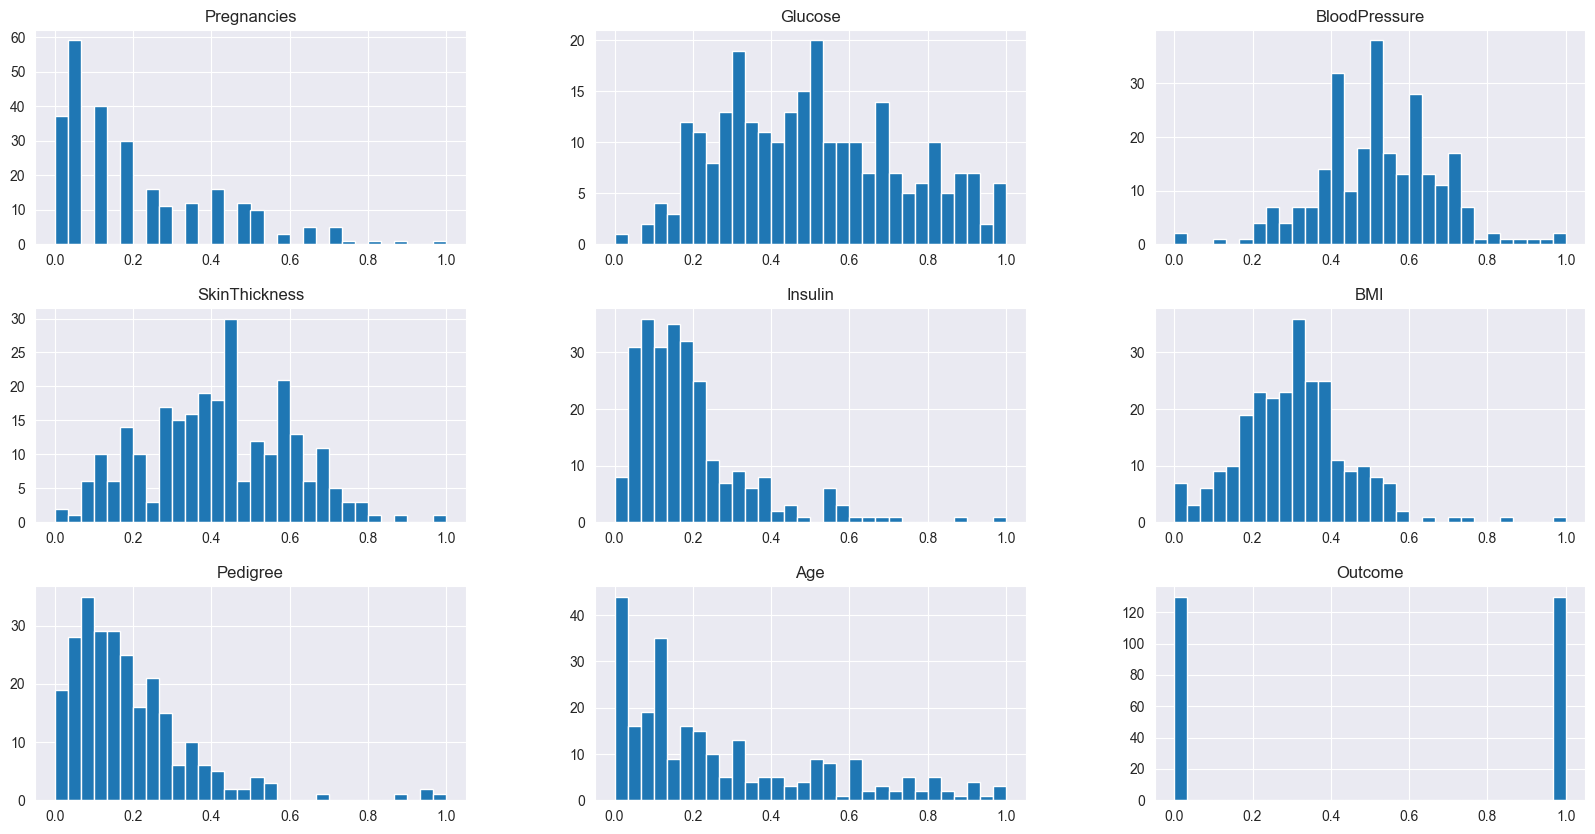

In [50]:
norm_data.hist(bins=30, figsize=(20, 10))

**Реализация метода K-ближайших соседей**

In [51]:
# Разделение данных на обучающий и тестовый наборы

shuffled_data = norm_data.sample(frac=1, random_state=52).reset_index(drop=True)


X = shuffled_data.drop('Outcome', axis=1)
Y = shuffled_data['Outcome']

In [52]:
def split_data_to_samples(X, Y, test_percent=0.2):
    test_size = int(len(X) * test_percent)

    x_train = X[test_size:]
    x_test = X[:test_size]
    y_train = Y[test_size:]
    y_test = Y[:test_size]

    return x_train, x_test, y_train, y_test

In [53]:
class KNN:
    def __init__(self, x_train, y_train, k=5):
        self.x_train = x_train
        self.y_train = y_train
        self.k = k

    def predict(self, x_test):
        return np.array([self.predict_test(x) for x in x_test])

    def predict_test(self, x):
        dists = [np.sqrt(np.sum((x - x_train_idx)**2)) for x_train_idx in self.x_train]

        k_idx = np.argsort(dists)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_idx]

        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

**Вычисление точности модели**

In [54]:
def accuracy_score(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)


def error_matrix(pred_y, true_y, n):
    res = np.zeros((n, n))
    for pr, tr in zip(pred_y, true_y):
        res[int(pr), int(tr)] += 1
    return res


def show_matrix(ax, pred_y, true_y, n):
    res = error_matrix(pred_y, true_y, n)
    ax.matshow(res, cmap='Blues')
    plt.grid(False)
    for (i, j), z in np.ndenumerate(res):
        ax.text(j, i, str(int(z)), ha='center', va='center', color='black')

**Модель 1 (Модель с случайным набором признаков)**

In [63]:
def random_features_knn(X, Y, k, indx):
    selected_features = random.sample(list(X.columns), random.randint(2, len(X.columns)))
    new_data = X[selected_features]
    # display(new_data.head())

    x_train, x_test, y_train, y_test = split_data_to_samples(np.array(new_data), np.array(Y), 0.2)

    print(f"Признаки: {selected_features}")
    print(f"Размер обучающей выборки: {len(x_train)}")
    print(pd.DataFrame(y_train).value_counts())
    print()
    print(f"Размер тестировочной выборки: {len(x_test)}")
    print(pd.DataFrame(y_test).value_counts())

    knn = KNN(x_train, y_train, k)
    y_pred = knn.predict(x_test)

    print("Оценка модели: ", accuracy_score(y_test, y_pred))

    ax = plt.subplot(1, 3, indx)
    ax.set_title('K = %d' %k)
    show_matrix(ax, y_pred, y_test, 2)
    print("-"*100+"\n\n")

Признаки: ['Pedigree', 'Age', 'Glucose', 'Insulin']
Размер обучающей выборки: 208
1.0    108
0.0    100
Name: count, dtype: int64

Размер тестировочной выборки: 52
0.0    30
1.0    22
Name: count, dtype: int64
Оценка модели:  0.6730769230769231
----------------------------------------------------------------------------------------------------


Признаки: ['Age', 'Insulin', 'BMI', 'BloodPressure', 'Pedigree', 'Glucose']
Размер обучающей выборки: 208
1.0    108
0.0    100
Name: count, dtype: int64

Размер тестировочной выборки: 52
0.0    30
1.0    22
Name: count, dtype: int64
Оценка модели:  0.6153846153846154
----------------------------------------------------------------------------------------------------


Признаки: ['Pregnancies', 'BloodPressure']
Размер обучающей выборки: 208
1.0    108
0.0    100
Name: count, dtype: int64

Размер тестировочной выборки: 52
0.0    30
1.0    22
Name: count, dtype: int64
Оценка модели:  0.6153846153846154
--------------------------------------------

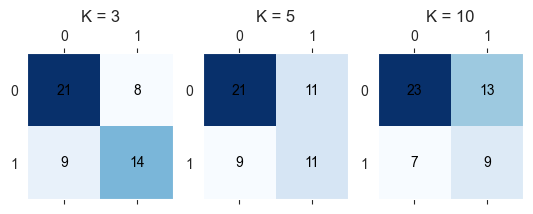

In [64]:
for i, k in enumerate([3, 5, 10], 1):
    random_features_knn(X, Y, k, i)

Столбцы - истинный класс, строки - предсказанный

**Модель 2 (Фиксированный набор признаков, который выбирается заранее)**

C:\Users\Inherency\PycharmProjects\SII_3\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


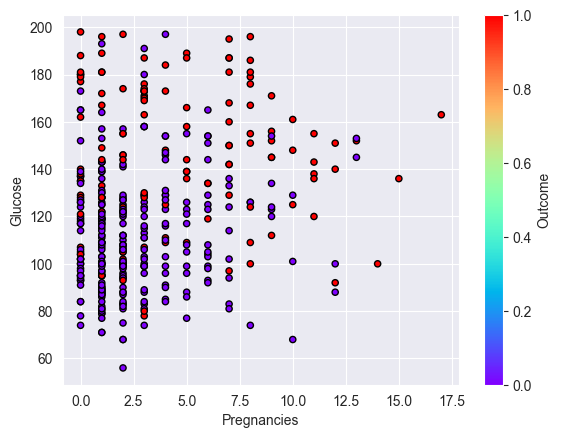

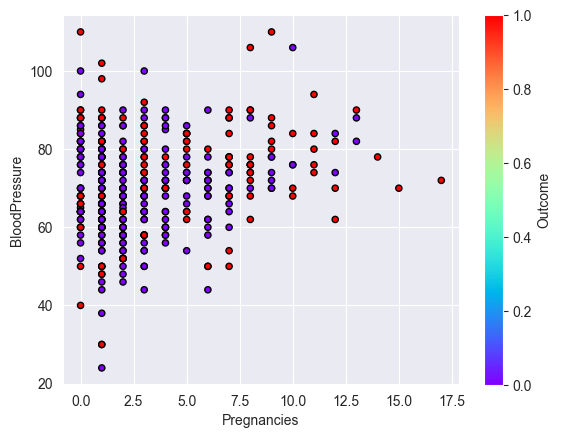

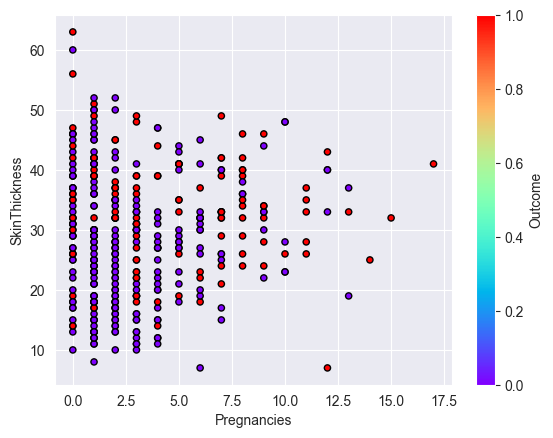

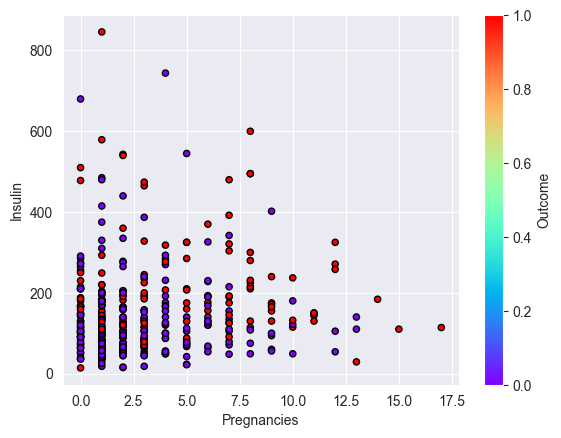

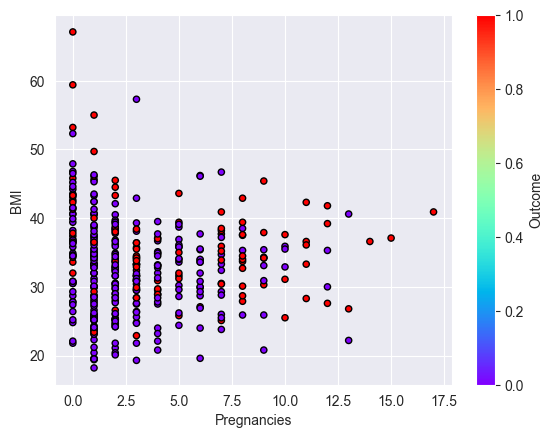

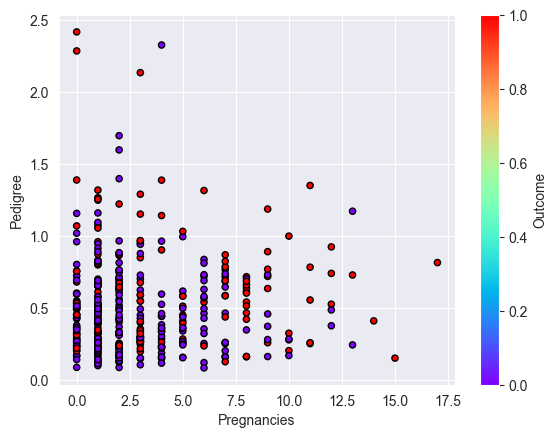

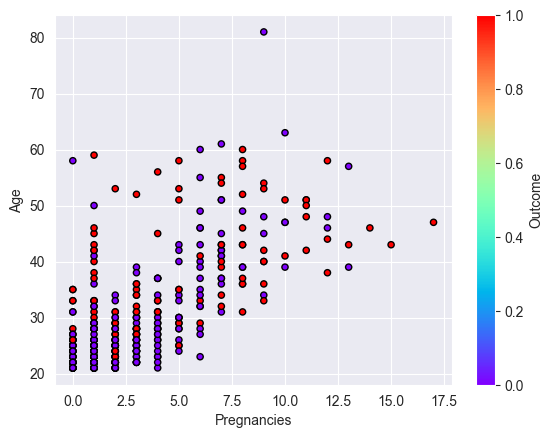

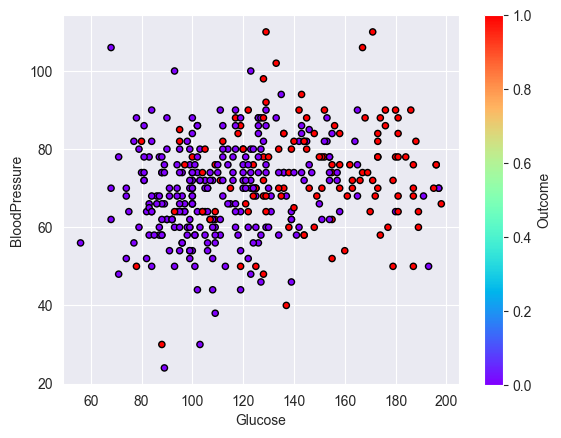

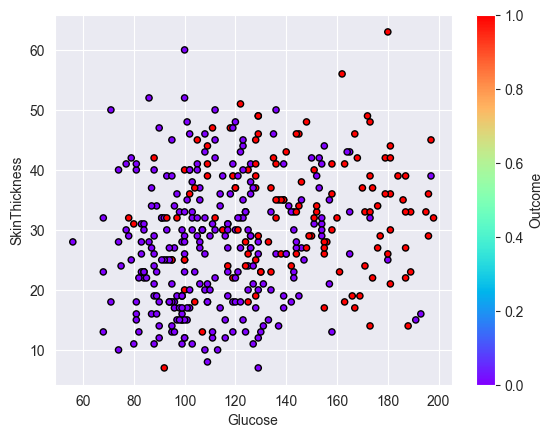

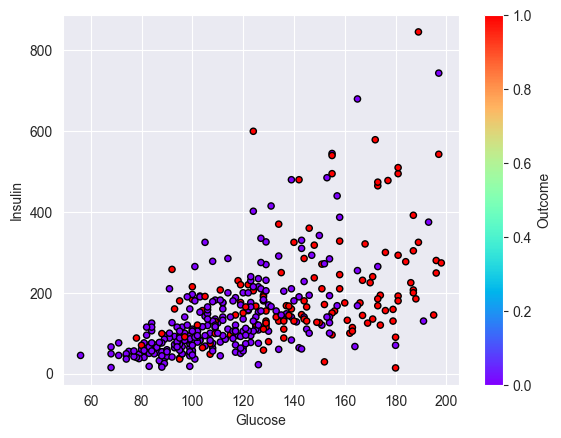

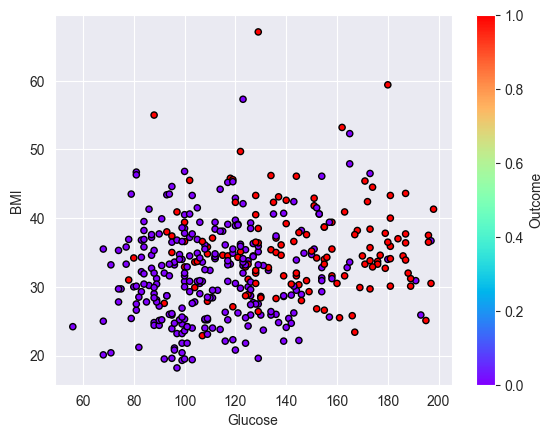

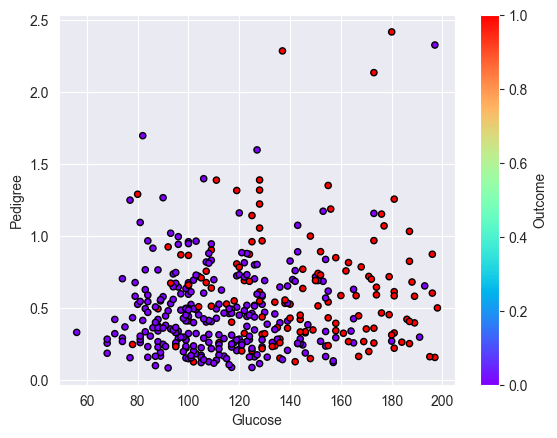

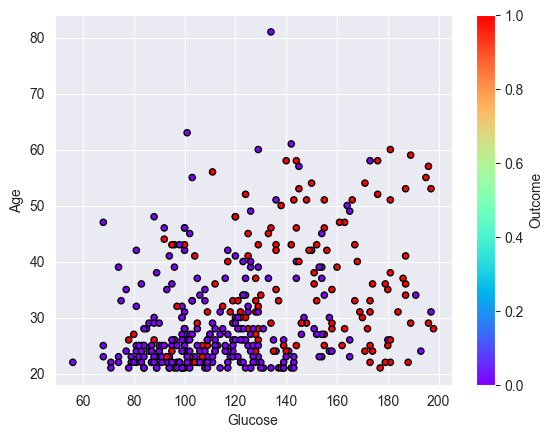

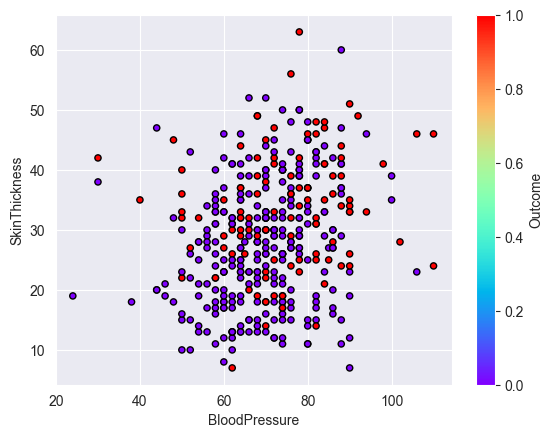

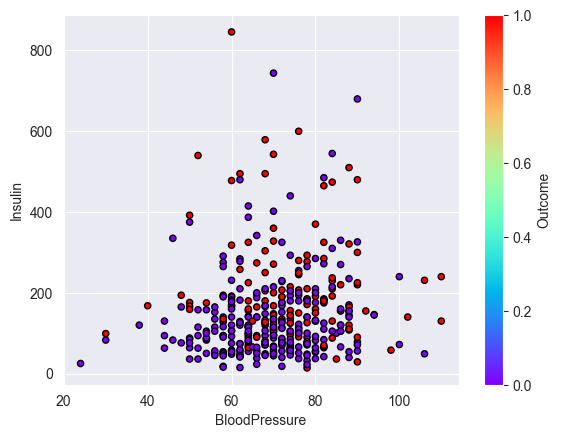

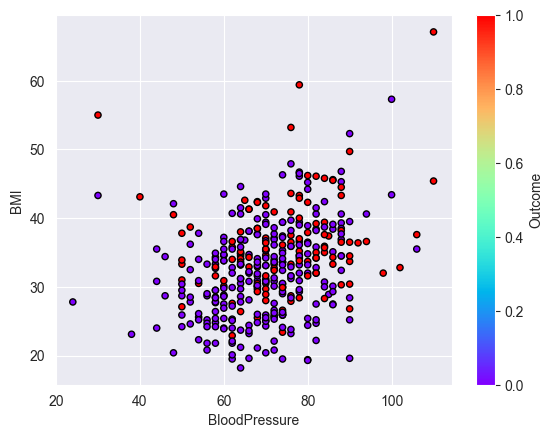

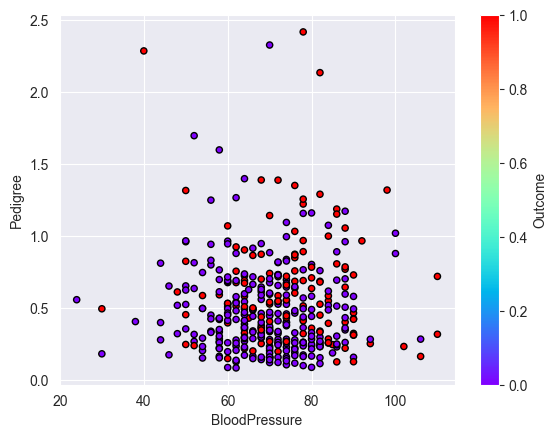

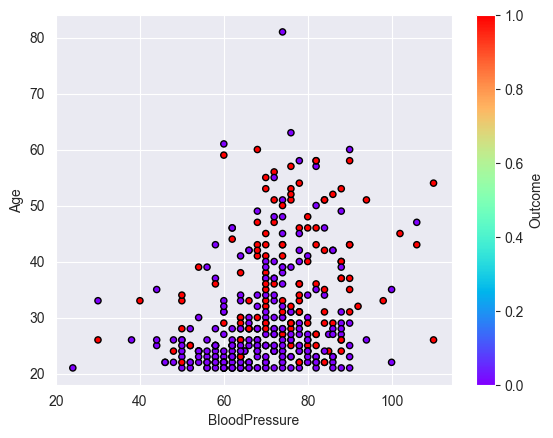

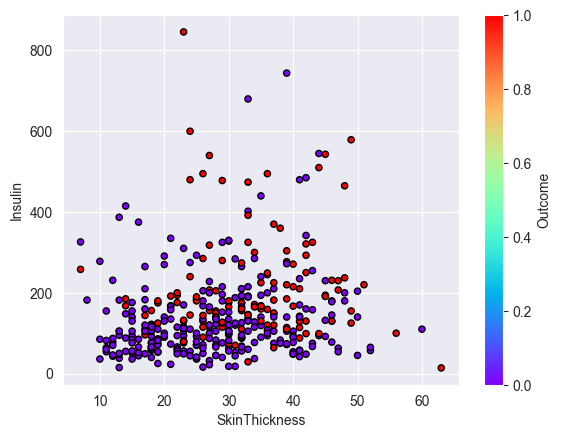

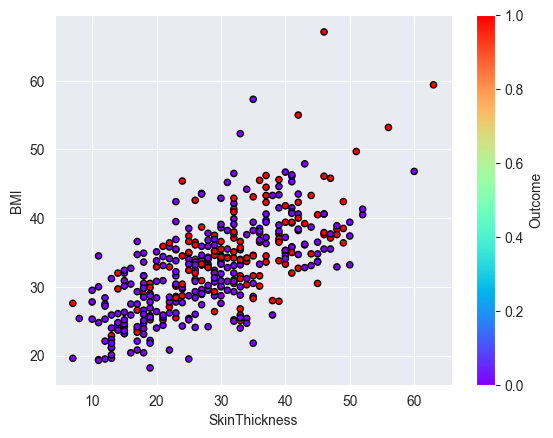

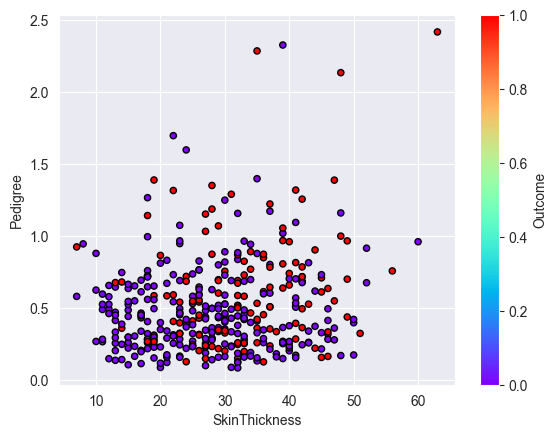

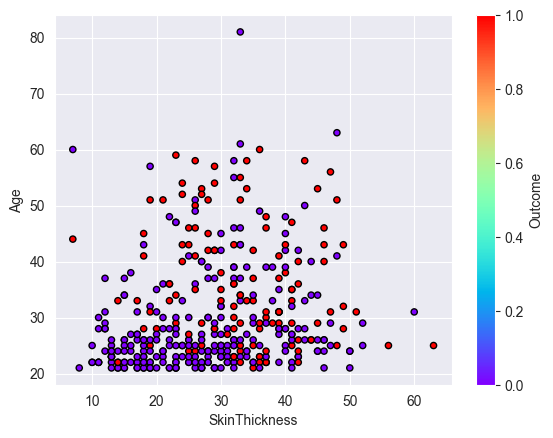

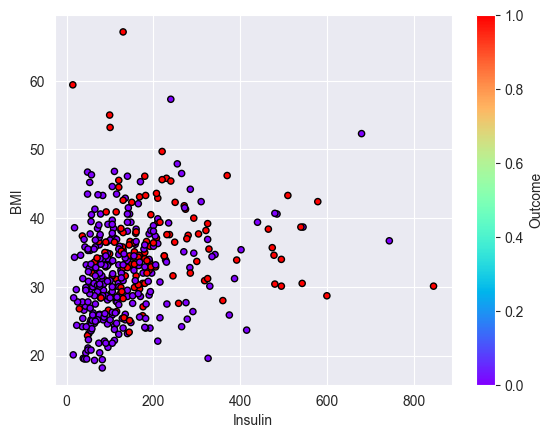

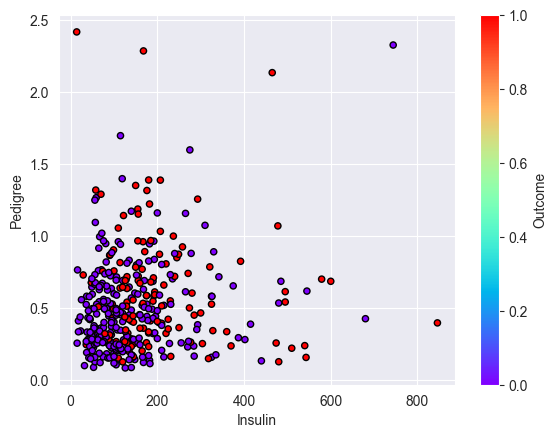

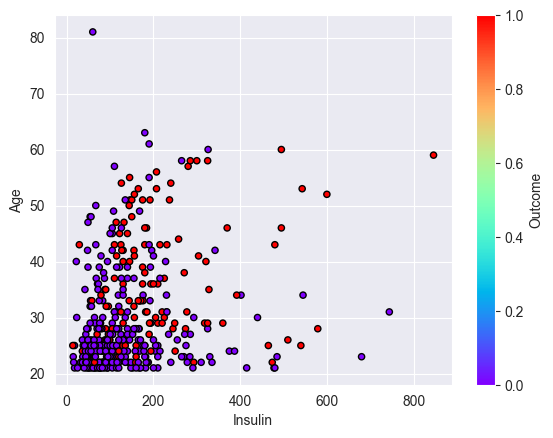

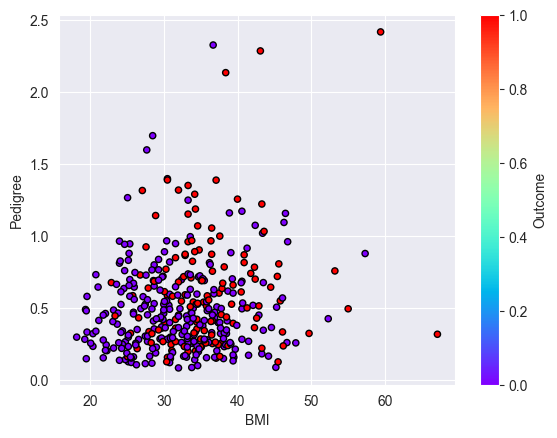

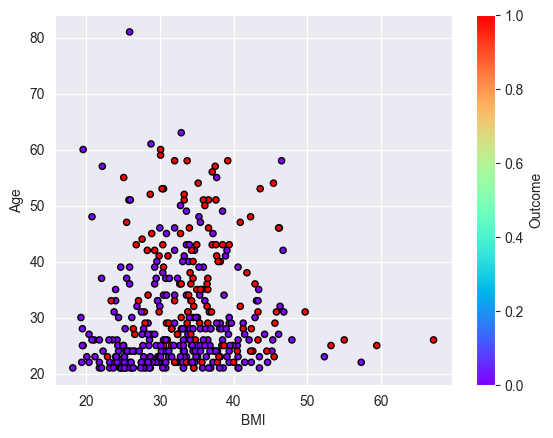

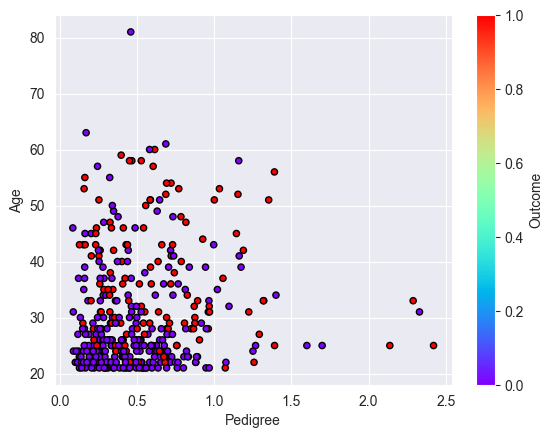

In [57]:
import itertools

x_train, x_test, y_train, y_test = split_data_to_samples(X, Y, 0.2)
columns = list(x_train.columns)
combinations = itertools.combinations(columns, 2)

for i_column_name, j_column_name in combinations:
    data.plot.scatter(x=i_column_name, y=j_column_name, c='Outcome', colormap='rainbow', edgecolor='black')


In [66]:
from itertools import combinations


def fix_features_knn(X, Y, k, i):
    x_train, x_test, y_train, y_test = split_data_to_samples(X, Y, 0.2)
    best_accuracy = 0
    best_feature_subset = []
    print(len(list(combinations(X.columns, 3))))
    best_pred = None

    for subset in combinations(X.columns, 3):
        selected_features = list(subset)

        X_train_subset = np.array(x_train[selected_features].values)
        X_test_subset = np.array(x_test[selected_features].values)

        knn = KNN(X_train_subset, np.array(y_train), k)
        y_pred = knn.predict(X_test_subset)

        accuracy = accuracy_score(np.array(y_test), y_pred)

        if accuracy > best_accuracy:
            best_pred = y_pred
            best_accuracy = accuracy
            best_feature_subset = selected_features

    print(f"Лучший набор признаков: {best_feature_subset}")
    print(f"Точность: {best_accuracy}")

    ax = plt.subplot(1, 3, i)
    ax.set_title('K = %d' %k)
    show_matrix(ax, best_pred, y_test, 2)

K = 3
56
Лучший набор признаков: ['Pregnancies', 'BMI', 'Age']
Точность: 0.8076923076923077
K = 5
56
Лучший набор признаков: ['Pregnancies', 'Pedigree', 'Age']
Точность: 0.75
K = 10
56
Лучший набор признаков: ['BMI', 'Pedigree', 'Age']
Точность: 0.75


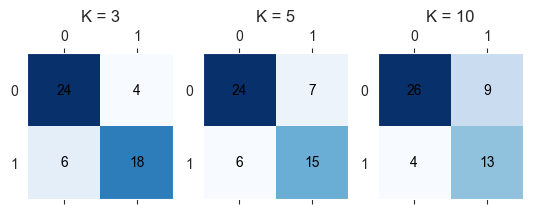

In [67]:
for i, k in enumerate([3, 5, 10], 1):
    print("K =", k)
    fix_features_knn(X, Y, k, i)

K = 3, Fixed features: ['Glucose', 'Pedigree', 'Age']


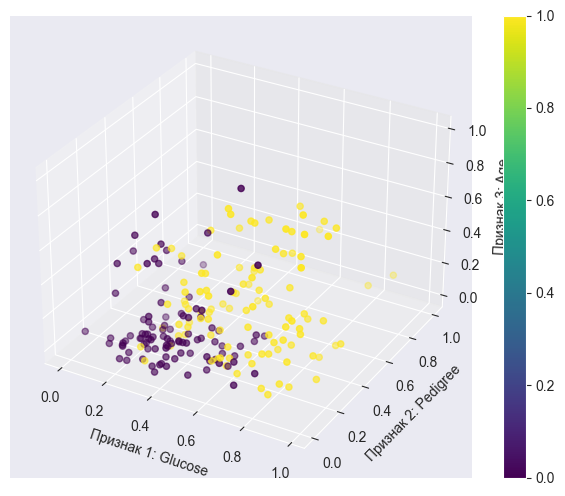

K = 5, Fixed features: ['Pregnancies', 'Glucose', 'Age']


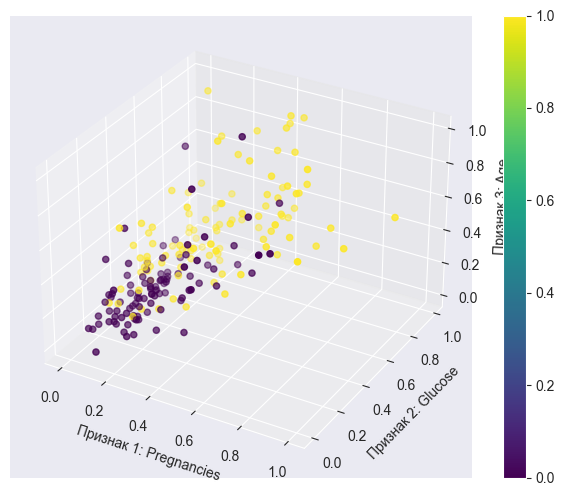

K = 10, Fixed features: ['Glucose', 'BloodPressure', 'Age']


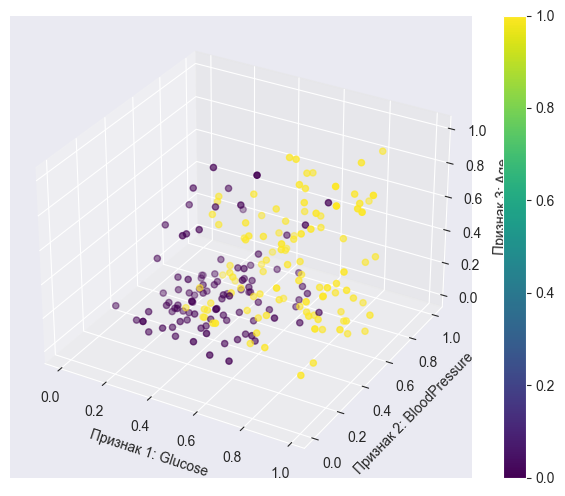

In [79]:
def plot_3d(X, y, features_indices):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    res = ax.scatter([x[0] for x in X], [x[1] for x in X], [x[2] for x in X], c=y, cmap="viridis")
    fig.colorbar(res)
    ax.set_xlabel("Признак 1: " + features_indices[0])
    ax.set_ylabel("Признак 2: " + features_indices[1])
    ax.set_zlabel("Признак 3: " + features_indices[2])
    plt.show()

fixed_features_list = {
    3: ['Glucose', 'Pedigree', 'Age'],
    5: ['Pregnancies', 'Glucose', 'Age'],
    10: ['Glucose', 'BloodPressure', 'Age']
}
for k in [3, 5, 10]:
    fixed_features = fixed_features_list[k]
    print(f"K = {k}, Fixed features: {fixed_features}")
    x_train, x_test, y_train, y_test = split_data_to_samples(X, Y, 0.2)
    x_train_subset = np.array(x_train[fixed_features].values)
    plot_3d(x_train_subset, np.array(y_train), fixed_features)
